In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("C:\\Users\\Rajiv2806\\Documents\\Resumes\\Inkredo Assesement\\test\\Wikimedia\\events_log.csv")
dataset.head()

,uuid,timestamp,session_id,group,action,checkin,page_id,n_results,result_position
0,00000736167c507e8ec225bd9e71f9e5,2.016030e+13,78245c2c3fba013a,b,searchResultPage,NaN,cbeb66d1bc1f1bc2,5.0,NaN
1,00000c69fe345268935463abbfa5d5b3,2.016031e+13,c559c3be98dca8a4,a,searchResultPage,NaN,eb658e8722aad674,10.0,NaN
2,00003bfdab715ee59077a3670331b787,2.016030e+13,760bf89817ce4b08,a,checkin,30.0,f99a9fc1f7fdd21e,NaN,NaN
3,0000465cd7c35ad2bdeafec953e08c1a,2.016030e+13,fb905603d31b2071,a,checkin,60.0,e5626962a6939a75,NaN,10.0
4,000050cbb4ef5b42b16c4d2cf69e6358,2.016030e+13,c2bf5e5172a892dc,a,checkin,30.0,787dd6a4c371cbf9,NaN,NaN


In [3]:
dataset['time_formatted'] = dataset.timestamp.astype(str)

for i in range(len(dataset)):
    dataset.at[i,'Day'] = dataset.time_formatted.loc[i][7:9]
    
dataset.head()

,uuid,timestamp,session_id,group,action,checkin,page_id,n_results,result_position,time_formatted,Day
0,00000736167c507e8ec225bd9e71f9e5,2.016030e+13,78245c2c3fba013a,b,searchResultPage,NaN,cbeb66d1bc1f1bc2,5.0,NaN,2.01603011038e+13,01
1,00000c69fe345268935463abbfa5d5b3,2.016031e+13,c559c3be98dca8a4,a,searchResultPage,NaN,eb658e8722aad674,10.0,NaN,2.01603070052e+13,07
2,00003bfdab715ee59077a3670331b787,2.016030e+13,760bf89817ce4b08,a,checkin,30.0,f99a9fc1f7fdd21e,NaN,NaN,2.01603021453e+13,02
3,0000465cd7c35ad2bdeafec953e08c1a,2.016030e+13,fb905603d31b2071,a,checkin,60.0,e5626962a6939a75,NaN,10.0,2.01603022227e+13,02
4,000050cbb4ef5b42b16c4d2cf69e6358,2.016030e+13,c2bf5e5172a892dc,a,checkin,30.0,787dd6a4c371cbf9,NaN,NaN,2.0160302095e+13,02


In [5]:
a_count_search = dataset[(dataset.group == "a" )&(dataset.action == 'searchResultPage')].groupby(['Day'])['uuid'].count()
b_count_search = dataset[(dataset.group == "b" )&(dataset.action == 'searchResultPage')].groupby(['Day'])['uuid'].count()
a_count_visits = dataset[(dataset.group == "a" )&(dataset.action == 'visitPage')].groupby(['Day'])['uuid'].count()
b_count_visits = dataset[(dataset.group == "b" )&(dataset.action == 'visitPage')].groupby(['Day'])['uuid'].count()

In [17]:
Q1_df = pd.DataFrame({'Xa':a_count_search,'Ya':a_count_visits,'Xb':b_count_search,'Yb':b_count_visits})
Q1_df['CTRa'] = Q1_df['Ya']/Q1_df['Xa']
Q1_df['CTRb'] = Q1_df['Yb']/Q1_df['Xb'] 

In [18]:
Q1_df

,Xa,Xb,Ya,Yb,CTRa,CTRb
Day,,,,,,
01,12582,5792,5925,729,0.470911,0.125863
02,13209,5693,5932,760,0.449088,0.133497
03,13280,5879,5775,799,0.434864,0.135907
04,11298,5377,3381,913,0.299257,0.169797
05,8612,4592,2513,810,0.291802,0.176394
06,9469,5143,2901,857,0.306368,0.166634
07,12699,6312,3610,1104,0.284274,0.174905
08,10907,5390,3228,870,0.295957,0.161410


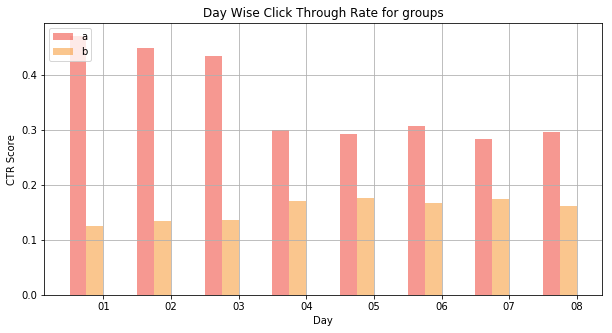

In [19]:
pos = list(range(len(Q1_df))) ;width = 0.25 

fig, ax = plt.subplots(figsize=(10,5))

plt.bar(pos, Q1_df['CTRa'],width, alpha=0.5,color='#EE3224',label=Q1_df.index[0]) 

plt.bar([p + width for p in pos], Q1_df['CTRb'],width,alpha=0.5,color='#F78F1E', label=Q1_df.index[1]) 

ax.set_ylabel('CTR Score')
ax.set_xlabel('Day')

ax.set_title('Day Wise Click Through Rate for groups')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(Q1_df.index)

plt.legend(['a', 'b'], loc='upper left')
plt.grid()
plt.show()

The overall ctr for group "a" is more. But the CTR has been showing a continuously decreasing trend for group "a".
while the CTR for "b" has shown a minimal increase in trend over the days.

2.	Which result position do people tend to try first? How does it change day-to-day?

In [5]:
tempa = pd.DataFrame(dataset[(dataset.group == "a")].groupby(['result_position'],as_index=False)['uuid'].count())

print "Most Clicked result position for group 'a' is:"
tempa[tempa.uuid == max(tempa.uuid)]

Most Clicked result position for group 'a' is:


,result_position,uuid
0,1.0,110733


In [6]:
tempb = pd.DataFrame(dataset[(dataset.group == "b")].groupby(['result_position'],as_index=False)['uuid'].count())

print "Most Clicked result position for group 'b' is:"
tempb[tempb.uuid == max(tempb.uuid)]

Most Clicked result position for group 'b' is:


,result_position,uuid
0,1.0,38621


In [7]:
tempO = pd.DataFrame(dataset.groupby(['result_position'],as_index=False)['uuid'].count())

print "Most Clicked result position Overall is:"
tempO[tempO.uuid == max(tempO.uuid)]

Most Clicked result position Overall is:


,result_position,uuid
0,1.0,149354


**So for both the groups and also the complete dataset, the result position - 1 is the most clicked on.**

In [9]:
temp_dfa = pd.DataFrame(dataset[(dataset.group == "a")].groupby(['Day','result_position'],as_index=False)['uuid'].count())
temp_dfb = pd.DataFrame(dataset[(dataset.group == "b")].groupby(['Day','result_position'],as_index=False)['uuid'].count())

In [19]:
def func1(g,d):
    tempa_d1 = pd.DataFrame()

    unique_sess_ga_day = list(pd.unique(dataset[(dataset.group == g)&(dataset.Day==d)]['session_id']))

    tempa_d1 = pd.DataFrame({'sid': unique_sess_ga_day})    

    for i in range(0,10): #,len(tempa_d1)):  # Adujested for time
        try:
            tempa_d1.at[i,'result_pos'] = max(dataset[(dataset.session_id == tempa_d1.sid[i])&(dataset.group == g)&(dataset.result_position.notnull())]['result_position'])
        except:
            tempa_d1.at[i,'result_pos'] = '0'
        tempa_d1.at[i,'day'] = d

    tempa_d1_1 = tempa_d1[tempa_d1.result_pos != 0].groupby(['result_pos'],as_index=False)['day'].count()
    maximum = max(tempa_d1[tempa_d1.result_pos != 0].groupby(['result_pos'],as_index=False)['day'].count()['day'])
    val = tempa_d1_1[tempa_d1_1.day == maximum]['result_pos']
    try:
        return val[0]
        print "group:",g,"day:",d,"completed..."
    except:
        return '0'
        print "group:",g,"day:",d,"completed with exception..."    

## In the interest of time the below code is run only for Day-1 and the rest of the days will follow similar lines if uncommented

In [20]:
start_time = time.ctime()
print "-------Start Time:---------",start_time
run_time = time.clock()

Q2_df = pd.DataFrame()

Q2_df.at[1,'ga'] = func1('a','01')
Q2_df.at[1,'gb'] = func1('b','01')

Q2_df.at[2,'ga'] = func1('a','02')
Q2_df.at[2,'gb'] = func1('b','02')

Q2_df.at[3,'ga'] = func1('a','03')
Q2_df.at[3,'gb'] = func1('b','03')

Q2_df.at[4,'ga'] = func1('a','04')
Q2_df.at[4,'gb'] = func1('b','04')

Q2_df.at[5,'ga'] = func1('a','05')
Q2_df.at[5,'gb'] = func1('b','05')

Q2_df.at[6,'ga'] = func1('a','06')
Q2_df.at[6,'gb'] = func1('b','06')

Q2_df.at[7,'ga'] = func1('a','07')
Q2_df.at[7,'gb'] = func1('b','07')

Q2_df.at[8,'ga'] = func1('a','08')
Q2_df.at[8,'gb'] = func1('b','08')

print "------Execution time:-------",(time.clock()-run_time)/60," Minutes."

-------Start Time:--------- Tue Nov 14 15:11:25 2017
------Execution time:------- 0.413838065318  Minutes.


In [21]:
Q2_df

,ga,gb
1,1,1.0
2,0,0.0
3,1,1.0
4,1,0.0
5,1,1.0
6,1,1.0
7,1,1.0
8,1,1.0


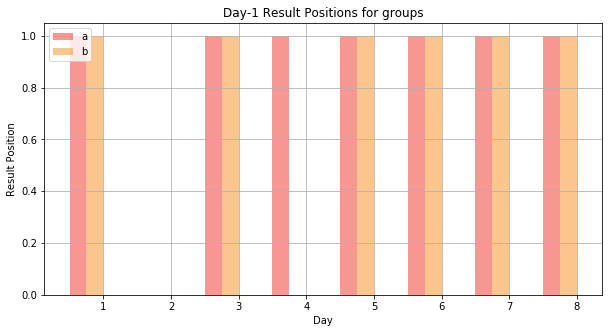

In [23]:
pos = list(range(len(Q2_df))) ;width = 0.25 

fig, ax = plt.subplots(figsize=(10,5))

plt.bar(pos, Q2_df['ga'],width, alpha=0.5,color='#EE3224',label=Q2_df.index[0]) 

plt.bar([p + width for p in pos], Q2_df['gb'],width,alpha=0.5,color='#F78F1E', label=Q2_df.index[1]) 

ax.set_ylabel('Result Position'); ax.set_xlabel('Day')

ax.set_title('Day-1 Result Positions for groups')

ax.set_xticks([p + 1.5 * width for p in pos])

ax.set_xticklabels(Q2_df.index)

plt.legend(['a', 'b'], loc='upper left')
plt.grid(); plt.show()